<a href="https://colab.research.google.com/github/amura/DetectingDeepFakes/blob/facedetect/DetectingDeepFakesPart1_facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring dataset

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import pandas as pd
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json
from PIL import Image
from PIL.ImageStat import Stat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pathlib
import cv2

In [3]:
# mmove images to folder for use later
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/deepfakes


/content/gdrive/MyDrive/deepfakes


### face detection

In [5]:
# install MTCNN
!pip install mtcnn


     |████████████████████████████████| 2.3MB 16.2MB/s 


Function for extracting the coordinates for the top left bounding box, width and height, and location of eyes

In [11]:
from mtcnn import MTCNN
import cv2


def extractFaceFromImage(filePath):
  #detect face
  img = cv2.cvtColor(cv2.imread(filePath), cv2.COLOR_BGR2RGB)
  detector = MTCNN()
  result = detector.detect_faces(img)


  # assumes only single person in the picture so index is 0
  return  result[0]['box'],  result[0]['keypoints']['left_eye'],  result[0]['keypoints']['right_eye'], img


In [12]:
from google.colab.patches import cv2_imshow

bb, left, right, img = extractFaceFromImage('./deepfake_sa1_output/00001.jpg')

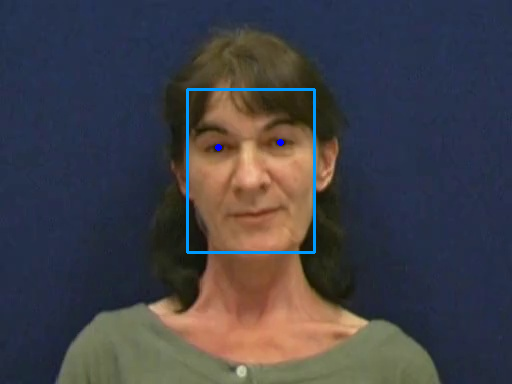

In [13]:


cv2.rectangle(img,
              (bb[0], bb[1]),
              (bb[0]+bb[2], bb[1] + bb[3]),
              (0,155,255),
              2)

cv2.circle(img,(left), 2, (0,0,255), 2)
cv2.circle(img,(right), 2, (0,0,255), 2)

cv2_imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))